<a href="https://colab.research.google.com/github/tosincarik/Regression-Model/blob/main/MultipleLinear_ConnectKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
!pip  install opendatasets
!pip install pandas

In [160]:
!pip install kaggle

In [161]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [162]:
cp kaggle.json ~/.kaggle/

In [163]:
import opendatasets as od
import pandas

In [164]:
! chmod 600 ~/.kaggle/kaggle.json

In [165]:
! kaggle datasets download akshaydattatraykhare/data-for-admission-in-the-university

data-for-admission-in-the-university.zip: Skipping, found more recently modified local copy (use --force to force download)


In [166]:
! unzip data-for-admission-in-the-university

Archive:  data-for-admission-in-the-university.zip
replace adm_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [167]:
df_adm = pd.read_csv('adm_data.csv')

In [187]:
## Check if there are any missing values in the dataset

df_adm.isnull().values.any()

False

In [188]:
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


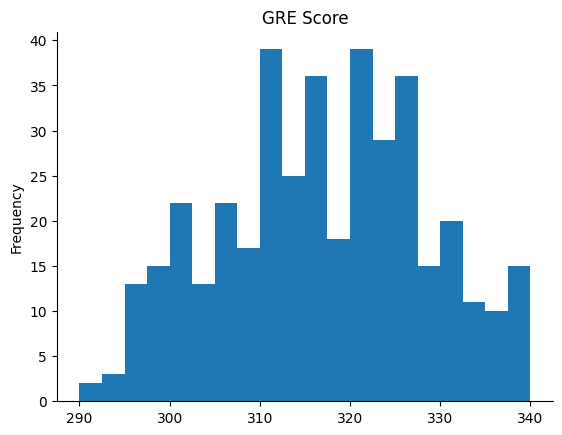

In [207]:
# @title GRE Score

from matplotlib import pyplot as plt
df_adm['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [189]:
df_adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [191]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [192]:
## Split the dataset and fetch the independent variables into X
X = df_adm.iloc[:, 1:-1].values
print(X)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]


[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [194]:
#Split the dataset into training and test sets
#Using scikit learn library , import the train test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [195]:
print(X_test)

[[309.   105.     5.     3.5    3.5    8.56   0.  ]
 [308.   110.     4.     3.5    3.     8.6    0.  ]
 [326.   110.     3.     3.5    3.5    8.76   1.  ]
 [306.   105.     2.     3.     2.5    8.26   0.  ]
 [316.   105.     3.     3.     3.5    8.73   0.  ]
 [309.   100.     2.     3.     3.     8.1    0.  ]
 [312.   109.     3.     3.     3.     8.69   0.  ]
 [312.   104.     3.     3.5    4.     8.09   0.  ]
 [332.   118.     2.     4.5    3.5    9.36   1.  ]
 [331.   117.     4.     4.5    5.     9.42   1.  ]
 [300.   105.     1.     1.     2.     7.8    0.  ]
 [333.   113.     5.     4.     4.     9.28   1.  ]
 [320.   110.     2.     4.     3.5    8.56   0.  ]
 [302.    99.     1.     2.     2.     7.25   0.  ]
 [328.   112.     4.     4.     4.5    9.1    1.  ]
 [311.   104.     2.     2.     2.     8.3    0.  ]
 [312.    98.     1.     3.5    3.     8.18   1.  ]
 [329.   110.     2.     4.     3.     9.15   1.  ]
 [315.    99.     2.     3.5    3.     7.89   0.  ]
 [313.   107

### **Multiple Linear Regression**

In [196]:
#Import the linearregression object and create an instance of the object
#Train the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

##Predictor for Linear Regression

In [197]:
y_pred = regressor.predict(X_test)

In [198]:
print(y_pred)

[0.7  0.69 0.78 0.62 0.72 0.6  0.71 0.64 0.87 0.92 0.54 0.89 0.71 0.46
 0.85 0.62 0.63 0.81 0.58 0.73 0.88 0.84 0.66 0.46 0.78 0.58 0.5  0.64
 0.89 0.65 0.64 0.74 0.74 0.56 0.78 0.77 0.65 0.86 0.63 0.93 0.73 0.67
 0.71 0.81 0.82 0.65 0.56 0.69 0.61 0.6  0.68 0.8  0.65 0.88 0.72 0.75
 0.71 0.73 0.76 0.83 0.77 0.47 0.64 0.52 0.84 0.82 0.74 0.87 0.77 0.75
 0.6  0.83 0.83 0.61 0.93 0.63 0.64 0.65 0.91 0.51]


In [199]:
print(y_test)

[0.71 0.7  0.79 0.73 0.72 0.48 0.77 0.71 0.9  0.94 0.58 0.89 0.72 0.57
 0.78 0.42 0.64 0.84 0.63 0.72 0.9  0.83 0.57 0.47 0.85 0.67 0.44 0.54
 0.92 0.62 0.68 0.73 0.73 0.61 0.55 0.74 0.64 0.89 0.73 0.95 0.71 0.72
 0.75 0.76 0.86 0.7  0.39 0.79 0.61 0.64 0.71 0.8  0.61 0.89 0.68 0.79
 0.78 0.52 0.76 0.88 0.74 0.49 0.65 0.59 0.87 0.89 0.81 0.9  0.8  0.76
 0.68 0.87 0.68 0.64 0.91 0.61 0.69 0.62 0.93 0.43]


In [201]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1)),1))

[[0.7  0.71]
 [0.69 0.7 ]
 [0.78 0.79]
 [0.62 0.73]
 [0.72 0.72]
 [0.6  0.48]
 [0.71 0.77]
 [0.64 0.71]
 [0.87 0.9 ]
 [0.92 0.94]
 [0.54 0.58]
 [0.89 0.89]
 [0.71 0.72]
 [0.46 0.57]
 [0.85 0.78]
 [0.62 0.42]
 [0.63 0.64]
 [0.81 0.84]
 [0.58 0.63]
 [0.73 0.72]
 [0.88 0.9 ]
 [0.84 0.83]
 [0.66 0.57]
 [0.46 0.47]
 [0.78 0.85]
 [0.58 0.67]
 [0.5  0.44]
 [0.64 0.54]
 [0.89 0.92]
 [0.65 0.62]
 [0.64 0.68]
 [0.74 0.73]
 [0.74 0.73]
 [0.56 0.61]
 [0.78 0.55]
 [0.77 0.74]
 [0.65 0.64]
 [0.86 0.89]
 [0.63 0.73]
 [0.93 0.95]
 [0.73 0.71]
 [0.67 0.72]
 [0.71 0.75]
 [0.81 0.76]
 [0.82 0.86]
 [0.65 0.7 ]
 [0.56 0.39]
 [0.69 0.79]
 [0.61 0.61]
 [0.6  0.64]
 [0.68 0.71]
 [0.8  0.8 ]
 [0.65 0.61]
 [0.88 0.89]
 [0.72 0.68]
 [0.75 0.79]
 [0.71 0.78]
 [0.73 0.52]
 [0.76 0.76]
 [0.83 0.88]
 [0.77 0.74]
 [0.47 0.49]
 [0.64 0.65]
 [0.52 0.59]
 [0.84 0.87]
 [0.82 0.89]
 [0.74 0.81]
 [0.87 0.9 ]
 [0.77 0.8 ]
 [0.75 0.76]
 [0.6  0.68]
 [0.83 0.87]
 [0.83 0.68]
 [0.61 0.64]
 [0.93 0.91]
 [0.63 0.61]
 [0.64 0.69]

##Accuracy Score

In [202]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6537876123347577

## Polynomial Regression

In [203]:
#convert the matrix of features of X to a polynomial matrix
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=3)
pol_reg.fit_transform(X)
X_Pol = pol_reg.fit_transform(X)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_Pol,y)

LinearRegression()

##Predictor for PolyRegression

In [204]:
y_pred = pol_reg2.predict(X_Pol)

In [205]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y.reshape(len(y),1)),1))

[[0.93 0.92]
 [0.78 0.76]
 [0.61 0.72]
 [0.75 0.8 ]
 [0.64 0.65]
 [0.89 0.9 ]
 [0.7  0.75]
 [0.67 0.68]
 [0.58 0.5 ]
 [0.67 0.45]
 [0.69 0.52]
 [0.82 0.84]
 [0.84 0.78]
 [0.58 0.62]
 [0.65 0.61]
 [0.64 0.54]
 [0.71 0.66]
 [0.64 0.65]
 [0.73 0.63]
 [0.67 0.62]
 [0.62 0.64]
 [0.71 0.7 ]
 [0.94 0.94]
 [0.97 0.95]
 [0.96 0.97]
 [0.95 0.94]
 [0.73 0.76]
 [0.39 0.44]
 [0.44 0.46]
 [0.46 0.54]
 [0.58 0.65]
 [0.71 0.74]
 [0.94 0.91]
 [0.93 0.9 ]
 [0.93 0.94]
 [0.86 0.88]
 [0.61 0.64]
 [0.55 0.58]
 [0.54 0.52]
 [0.49 0.48]
 [0.61 0.46]
 [0.64 0.49]
 [0.63 0.53]
 [0.78 0.87]
 [0.93 0.91]
 [0.87 0.88]
 [0.92 0.86]
 [0.82 0.89]
 [0.8  0.82]
 [0.76 0.78]
 [0.77 0.76]
 [0.61 0.56]
 [0.81 0.78]
 [0.74 0.72]
 [0.67 0.7 ]
 [0.66 0.64]
 [0.59 0.64]
 [0.44 0.46]
 [0.38 0.36]
 [0.64 0.42]
 [0.6  0.48]
 [0.6  0.47]
 [0.65 0.54]
 [0.68 0.56]
 [0.69 0.52]
 [0.71 0.55]
 [0.73 0.61]
 [0.74 0.57]
 [0.8  0.68]
 [0.85 0.78]
 [0.96 0.94]
 [0.96 0.96]
 [0.89 0.93]
 [0.82 0.84]
 [0.72 0.74]
 [0.76 0.72]
 [0.76 0.74]

In [206]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.8506760989774554